In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os
import pickle
from eeva.utils.drawer import save_figures
from pathlib import Path

## config interactive configuration

In [9]:
from scripts import config_setter

b = config_setter.Board('.', "../../experiment_configs/exp_conf_grid", "grid_bigg")

b.get_plot()

In [2]:
b.save_config()

try save
saving: scan_greater_get,
 path: ./configs/exp_configs
['README.md', 'pyproject.toml', '.gitignore', '.DS_Store', 'poetry.lock', 'experiment_helpers', '.git', 'run_plots', 'run_results', 'cache', 'data', 'run_grid', 'conf']


## redraw experiments

In [12]:
path = Path("../run_results/")
paths = [ p for p in path.rglob("") if p.parts[-1].startswith("")][1:]
for p in paths:
   print(p)
   os.system(f"python3 ./scripts/redraw.py {p}") 

## Prepare text and pictures for latex

In [2]:
from scripts import to_tex
path = Path("/runs/run_results/")
paths = [ p for p in path.rglob("") if p.parts[-1].startswith("")][1:]
to_save = Path("../run_plots/")


to_tex.prepare_for_tex(paths, to_save)

/runs/run_results/scan_greater_get/pair_image.pdf
/runs/run_results/dummy/pair_image.pdf
/runs/run_results/scan_lower_get/pair_image.pdf
/runs/run_results/scan_eq_get/pair_image.pdf
/runs/run_results/scan_more_distinguish/pair_image.pdf
/runs/run_results/zero_scan/pair_image.pdf

egin{figure*}[!ht]
    \centering
   egin{subfigure}{0.3\linewidth}
        \includegraphics[width=	extwidth]{figures/experiments/scan_greater_get_cost_density_image.pdf}
    \end{subfigure}
   egin{subfigure}{0.6\linewidth}
        \includegraphics[width=	extwidth]{figures/experiments/scan_greater_get_pair_image.pdf}
    \end{subfigure}

    \caption{Figure for "scan greater get"  generated data}
    \label{fig::scan_greater_get}
\end{figure*}



egin{figure*}[!ht]
    \centering
   egin{subfigure}{0.3\linewidth}
        \includegraphics[width=	extwidth]{figures/experiments/dummy_cost_density_image.pdf}
    \end{subfigure}
   egin{subfigure}{0.6\linewidth}
        \includegraphics[width=	extwidth]{figures/e

In [6]:
path = Path("/runs/run_results/")
paths = [ p for p in path.rglob("") if p.parts[-1].startswith("")][1:]
to_save = Path("../run_plots/")
parts = ["Barplot_image", "pair"]
to_tex.copy_reg_expression(paths, to_save, parts)

## plot grid experiment

In [8]:
command = "cd .. && python3 experiment_helpers/run_grid_experiment.py ../experiment_configs/exp_conf_grid grid"
# os.system(command)

In [22]:
rez_path.exists()

True

In [25]:
%load_ext autoreload
%autoreload 2

from scripts import grid_plot
from hydra import compose,  initialize
import json
import os
conf_path = "../experiment_configs/exp_conf_grid/"
conf_name = "grid_bigg"

# run_grid/grid_bigg
rez_path = Path("../run_grid/grid_bigg")
rez_paths = list(Path(rez_path).rglob("*.pickle"))
dcts = []
for p in rez_paths:
    with open(p, "r") as f:
        rez = json.load(f)
        dcts.append(rez)
# dcts = [a for a in dcts if len(a.items()) > 6]
with initialize(version_base="1.3", config_path=conf_path):
    cfg = compose(config_name=conf_name, overrides=[])

import numpy as np
rez = {}
for p_value, alg_rez in dcts[0].items():
    tmp_rez = {}
    for key in alg_rez.keys():
        tmp_dat = np.array([dcts[i][p_value][key] for i in range(len(dcts))]).squeeze()
        tmp_rez[key] = tmp_dat
    rez[p_value] = tmp_rez
    
print(dcts)
p, fig = grid_plot.plot_dict(cfg, rez)

save_figures({"fig": fig}, Path("."))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[{'0.0': {'lru': [[3762, 0.8638, 0.0, 0.863802]], 'cacheus': [[3762, 0.8568, 0.0, 0.856828]], 'qdlp': [[3762, 0.8515, 0.0, 0.85146]], 'tinylfu': [[3762, 0.8491, 0.0, 0.849086]], 'EEvA-Greedy': [[3762, 0.818376, 0.0, 0.818376]], 'EEvA-T': [[3762, 0.81462, 0.0, 0.81462]], 'EEvA-Seq': [[3762, 0.838234, 0.0, 0.838234]]}, '0.00018': {'lru': [[3762, 0.8812, 0.10265028052364414, 0.778584023510553]], 'cacheus': [[3762, 0.8762, 0.10428711372339478, 0.7718852969988422]], 'qdlp': [[3762, 0.8691, 0.106969454092083, 0.7620999198503874]], 'tinylfu': [[3762, 0.8675, 0.1067005076142132, 0.7608282126636388]], 'EEvA-Greedy': [[3762, 0.8397987354172233, 0.10856888413928222, 0.731229851277941]], 'EEvA-T': [[3762, 0.8362525603348473, 0.1085065455516965, 0.7277460147831508]], 'EEvA-Seq': [[3762, 0.8576151037492208, 0.10628194852613768, 0.7513331552230831]]}, '0.00036': {'lru': [[3762, 0.8939, 0.19400208199517155, 0.69992

## run experiments

In [9]:
command = "cd .. && python3 experiment_helpers/run_config.py ../experiment_configs/exp_configs scan_eq_get"

# os.system(command)

['scan_eq_get']
./configs/exp_configs


0it [00:00, ?it/s]

# dynamic misses


In [2]:
import pickle
p = "/runs/run_results/scan_more_distinguish/runs_history.pickle"

with open(p, 'rb') as f:
    dat = pickle.load(f)

In [3]:
import numpy as np

arrs = []
algs = []
for dd in dat:
    for alg in dd.keys():
        algs.append(alg)
        arrs.append(np.cumsum(dd[alg][2][2]))


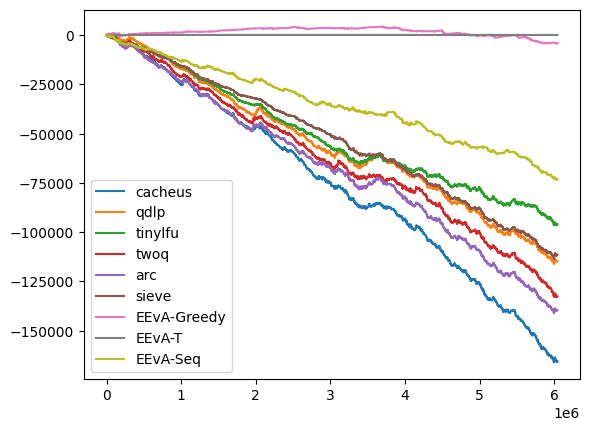

In [4]:
import matplotlib.pyplot as plt
for hits, alg in zip(arrs, algs):
    plt.plot((hits - arrs[-2]), label = alg)
plt.legend()

In [5]:
import matplotlib.pyplot as plt
for hits, alg in zip(arrs, algs):
    plt.plot((hits), label = alg)
plt.legend()